# Differential Adherence Framework
## Orthogonal Decomposition vs Sum-Score Flattening

**Demonstrates** that the Differential Adherence Index (Δ = intentional − unintentional) captures
statistically significant clinical heterogeneity that sum-scoring (as used by MMAS and similar
instruments) provably destroys.

**Data**: NeuroGerAd study (N=907 neurological patients)  
Prell et al. (2022) *Sci Data* 9, 734. doi:10.1038/s41597-022-01847-9  
Available: https://osf.io/kuaph/

**Instrument**: SAMS (Stendal Adherence to Medication Score) — 18 items, 0–4 Likert  
Sub-factors per validated 3-factor CFA (Prell et al. 2022):  
- Forgetting (unintentional): items 6, 14, 15, 16, 18  
- Intentional modification: items 4, 7, 8, 9, 10, 11, 12, 13, 17  
- Missing knowledge: items 1, 2, 3, 5

**Usage**: Place `NeuroGerAd_Data_OSF.xlsx` in the same folder as this notebook.

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

FIGURE_DPI = 300
print('Dependencies loaded.')

Dependencies loaded.


## 1. Data Loading

Load `NeuroGerAd_Data_OSF.xlsx` and compute SAMS sub-factor means.

In [4]:
# SAMS sub-factor item mapping (validated 3-factor CFA, Prell et al. 2022)
# Scale: 0 = 'never' to 4 = 'most of the time' (higher = more nonadherent)
UNINTENTIONAL_ITEMS = ['sams_6', 'sams_14', 'sams_15', 'sams_16', 'sams_18']   # forgetting
INTENTIONAL_ITEMS   = ['sams_4', 'sams_7', 'sams_8', 'sams_9', 'sams_10',      # modification
                       'sams_11', 'sams_12', 'sams_13', 'sams_17']
KNOWLEDGE_ITEMS     = ['sams_1', 'sams_2', 'sams_3', 'sams_5']                  # missing knowledge

# Load
raw = pd.read_excel('NeuroGerAd_Data_OSF.xlsx')
print(f'Raw: {len(raw)} rows, {len(raw.columns)} columns')

# Sub-factor means (means, not sums — comparable across unequal item counts)
raw['unintentional'] = raw[UNINTENTIONAL_ITEMS].mean(axis=1)
raw['intentional']   = raw[INTENTIONAL_ITEMS].mean(axis=1)
raw['knowledge']     = raw[KNOWLEDGE_ITEMS].mean(axis=1)
raw['group']         = raw['diagnosis_collapsed']

df = raw.dropna(subset=['unintentional', 'intentional', 'group']).copy()
print(f'Valid: {len(df)} (dropped {len(raw) - len(df)} with all items missing in a subscale or missing diagnosis)')

# Core computed variables
df['delta']      = df['intentional'] - df['unintentional']
df['mmas_proxy'] = df['intentional'] + df['unintentional']
df['direction']  = np.where(df['delta'] >= 0,
                            'Intentional-dominant', 'Unintentional-dominant')

df[['unintentional', 'intentional', 'knowledge', 'delta', 'mmas_proxy',
    'direction', 'group']].head(10)

Raw: 910 rows, 74 columns
Valid: 907 (dropped 3 with all items missing in a subscale or missing diagnosis)


,unintentional,intentional,knowledge,delta,mmas_proxy,direction,group
0,0.0,0.000000,0.00,0.000000,0.000000,Intentional-dominant,movement disorder
1,0.4,0.222222,1.00,-0.177778,0.622222,Unintentional-dominant,movement disorder
2,0.2,0.000000,0.00,-0.200000,0.200000,Unintentional-dominant,movement disorder
3,0.0,0.000000,0.25,0.000000,0.000000,Intentional-dominant,movement disorder
4,3.0,3.555556,0.75,0.555556,6.555556,Intentional-dominant,movement disorder
5,0.0,0.111111,0.00,0.111111,0.111111,Intentional-dominant,movement disorder
6,0.0,0.111111,0.00,0.111111,0.111111,Intentional-dominant,movement disorder
7,0.2,0.555556,1.75,0.355556,0.755556,Intentional-dominant,movement disorder
8,0.0,0.000000,0.00,0.000000,0.000000,Intentional-dominant,movement disorder
9,0.4,0.333333,1.25,-0.066667,0.733333,Unintentional-dominant,movement disorder


## 2. Descriptive Statistics

In [8]:
print('Sub-factor means (0-4 scale, higher = more nonadherent):')
print(f'  Unintentional (forgetting, 5 items):  '
      f'M = {df["unintentional"].mean():.3f}, SD = {df["unintentional"].std():.3f}')
print(f'  Intentional (modification, 9 items):  '
      f'M = {df["intentional"].mean():.3f}, SD = {df["intentional"].std():.3f}')
print(f'  Missing knowledge (4 items):          '
      f'M = {df["knowledge"].mean():.3f}, SD = {df["knowledge"].std():.3f}')
print()
print('Differential Adherence Index (delta = intentional - unintentional):')
print(f'  Mean = {df["delta"].mean():.3f}, SD = {df["delta"].std():.3f}')
print(f'  Range = [{df["delta"].min():.3f}, {df["delta"].max():.3f}]')
print(f'  Intentional-dominant (delta >= 0): '
      f'{(df["delta"] >= 0).sum()} ({(df["delta"] >= 0).mean()*100:.1f}%)')
print(f'  Unintentional-dominant (delta < 0): '
      f'{(df["delta"] < 0).sum()} ({(df["delta"] < 0).mean()*100:.1f}%)')
print()
print('Sum-score proxy (MMAS-like = intentional + unintentional):')
print(f'  Mean = {df["mmas_proxy"].mean():.3f}, SD = {df["mmas_proxy"].std():.3f}')

Sub-factor means (0-4 scale, higher = more nonadherent):
  Unintentional (forgetting, 5 items):  M = 0.425, SD = 0.542
  Intentional (modification, 9 items):  M = 0.297, SD = 0.507
  Missing knowledge (4 items):          M = 0.442, SD = 0.796

Differential Adherence Index (delta = intentional - unintentional):
  Mean = -0.129, SD = 0.528
  Range = [-2.400, 2.733]
  Intentional-dominant (delta >= 0): 485 (53.5%)
  Unintentional-dominant (delta < 0): 422 (46.5%)

Sum-score proxy (MMAS-like = intentional + unintentional):
  Mean = 0.722, SD = 0.906


In [10]:
# Group-level summary table
summary = df.groupby('group').agg(
    N=('delta', 'count'),
    Unintentional_M=('unintentional', 'mean'),
    Unintentional_SD=('unintentional', 'std'),
    Intentional_M=('intentional', 'mean'),
    Intentional_SD=('intentional', 'std'),
    Delta_M=('delta', 'mean'),
    Delta_SD=('delta', 'std'),
    Pct_Intentional_Dominant=('delta', lambda x: (x >= 0).mean() * 100),
    Sum_M=('mmas_proxy', 'mean'),
    Sum_SD=('mmas_proxy', 'std')
).round(3)

print('Table 1: Population Statistics by Diagnosis Group')
display(summary)

Table 1: Population Statistics by Diagnosis Group


,N,Unintentional_M,Unintentional_SD,Intentional_M,Intentional_SD,Delta_M,Delta_SD,Pct_Intentional_Dominant,Sum_M,Sum_SD
group,,,,,,,,,,
cerebrovascular disorder,231,0.390,0.547,0.282,0.521,-0.108,0.443,57.143,0.672,0.972
epilepsy,48,0.435,0.488,0.238,0.341,-0.197,0.497,50.000,0.674,0.679
movement disorder,303,0.503,0.583,0.322,0.540,-0.180,0.589,46.865,0.825,0.957
neuromuscular,167,0.342,0.499,0.315,0.514,-0.027,0.496,61.078,0.657,0.883
others,158,0.414,0.496,0.268,0.451,-0.146,0.545,53.797,0.682,0.775


## 3. Statistical Tests

**Core logic**: If sum and Δ are orthogonal (uncorrelated), they contain independent
information. If groups differ on Δ but not on sum, that is signal sum-scoring provably destroys.

In [13]:
def sig_label(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'ns'

# --- Orthogonality ---
r, p = stats.pearsonr(df['mmas_proxy'], df['delta'])
print(f'Orthogonality (Pearson): r = {r:.3f}, p = {p:.4f}')
print(f'  Shared variance: {r**2*100:.1f}%')
print(f'  Shared variance (r\u00b2): {r**2*100:.1f}%')
print()

# --- ANOVA ---
groups = sorted(df['group'].unique())
k, n = len(groups), len(df)
grp_delta = [df[df['group'] == g]['delta'].values for g in groups]
grp_mmas  = [df[df['group'] == g]['mmas_proxy'].values for g in groups]

f_d, p_d = stats.f_oneway(*grp_delta)
f_m, p_m = stats.f_oneway(*grp_mmas)
eta_d = (f_d * (k-1)) / (f_d * (k-1) + (n-k))
eta_m = (f_m * (k-1)) / (f_m * (k-1) + (n-k))

print(f'ANOVA by diagnosis group:')
print(f'  delta: F({k-1},{n-k}) = {f_d:.2f}, p = {p_d:.4f} {sig_label(p_d)}, '
      f'eta2 = {eta_d:.4f}')
print(f'  Sum:   F({k-1},{n-k}) = {f_m:.2f},  p = {p_m:.4f} {sig_label(p_m)}, '
      f'eta2 = {eta_m:.4f}')
print()
if p_d < 0.05 and p_m >= 0.05:
    print('*** HEADLINE: Groups differ on delta (p<.05) but NOT on sum (p>.05). ***')
    print('    Sum-scoring destroys individual-level directionality (many-to-one projection).')

# Store for figures
sr = dict(r=r, r_p=p, f_delta=f_d, p_delta=p_d, eta_delta=eta_d,
          f_mmas=f_m, p_mmas=p_m, eta_mmas=eta_m, k=k, n=n)

Orthogonality (Pearson): r = -0.077, p = 0.0208
  Shared variance: 0.6%
  Shared variance (r²): 0.6%

ANOVA by diagnosis group:
  delta: F(4,902) = 2.63, p = 0.0334 *, eta2 = 0.0115
  Sum:   F(4,902) = 1.48,  p = 0.2054 ns, eta2 = 0.0065

*** HEADLINE: Groups differ on delta (p<.05) but NOT on sum (p>.05). ***
    Sum-scoring destroys individual-level directionality (many-to-one projection).


In [15]:
# Pairwise t-tests on delta
print(f'{"Comparison":<50} {"t":>7} {"p":>8} {"d":>7} {"sig":>4}')
print('-' * 76)
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        g1, g2 = groups[i], groups[j]
        d1 = df[df['group'] == g1]['delta'].values
        d2 = df[df['group'] == g2]['delta'].values
        t_stat, p_val = stats.ttest_ind(d1, d2)
        pooled_sd = np.sqrt((d1.std()**2 + d2.std()**2) / 2)
        d_val = (d1.mean() - d2.mean()) / pooled_sd if pooled_sd > 0 else 0
        label = f'{g1} vs {g2}'
        print(f'{label:<50} {t_stat:>7.2f} {p_val:>8.4f} {d_val:>7.2f} '
              f'{sig_label(p_val):>4}')

Comparison                                               t        p       d  sig
----------------------------------------------------------------------------
cerebrovascular disorder vs epilepsy                  1.24   0.2166    0.19   ns
cerebrovascular disorder vs movement disorder         1.56   0.1191    0.14   ns
cerebrovascular disorder vs neuromuscular            -1.71   0.0882   -0.17   ns
cerebrovascular disorder vs others                    0.75   0.4541    0.08   ns
epilepsy vs movement disorder                        -0.18   0.8542   -0.03   ns
epilepsy vs neuromuscular                            -2.09   0.0378   -0.34    *
epilepsy vs others                                   -0.58   0.5613   -0.10   ns
movement disorder vs neuromuscular                   -2.85   0.0046   -0.28   **
movement disorder vs others                          -0.62   0.5381   -0.06   ns
neuromuscular vs others                               2.05   0.0409    0.23    *


## 4. Figure 1: 3D Decomposition vs Sum-Score Reduction

Panel A shows the full orthogonal decomposition with Δ as the vertical axis.  
Panel B shows what sum-scoring actually gives you: a single number per patient.

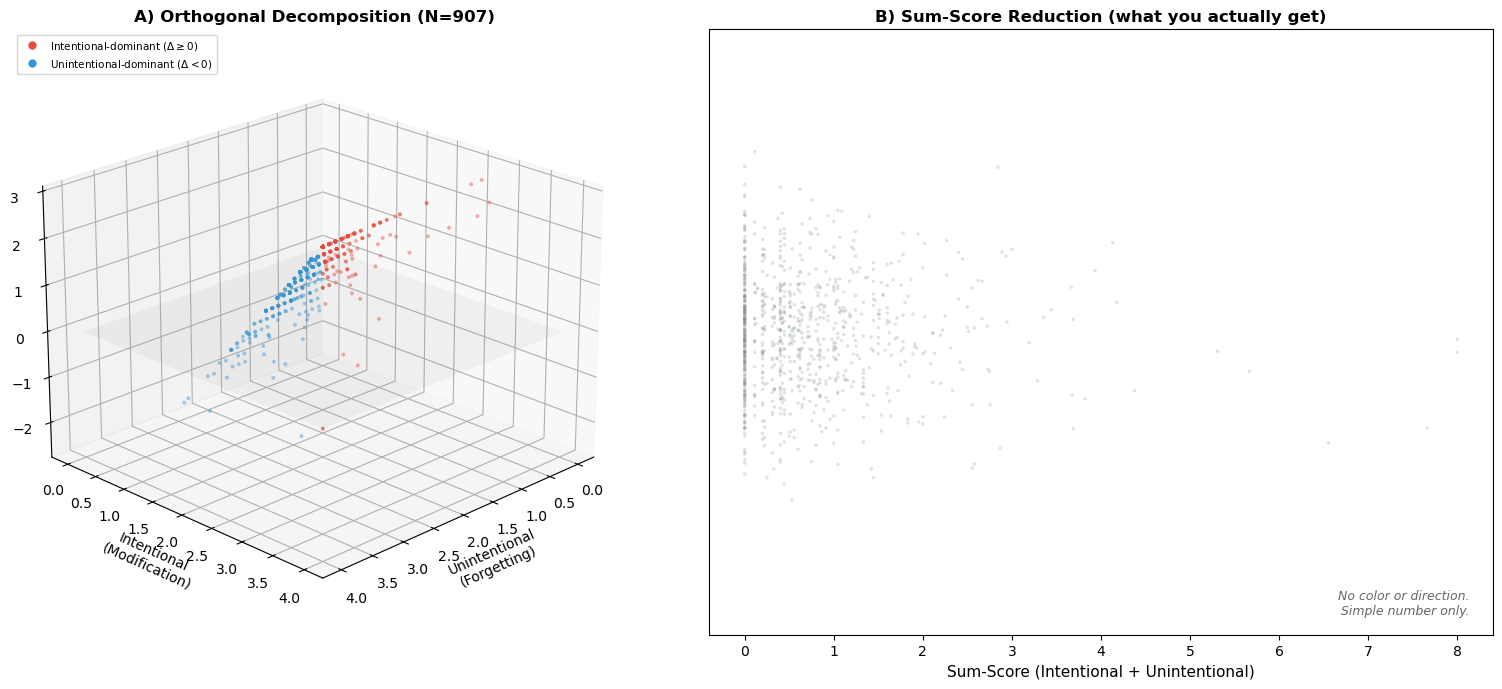

Saved: fig1_3d_vs_sumscore.png


In [33]:
fig = plt.figure(figsize=(16, 7))

# --- Panel A: 3D orthogonal decomposition ---
ax1 = fig.add_subplot(121, projection='3d')
colors = np.where(df['delta'] >= 0, '#e74c3c', '#3498db')
ax1.scatter(df['unintentional'], df['intentional'], df['delta'],
            c=colors, s=8, alpha=0.45, edgecolors='none')

xx, yy = np.meshgrid(
    np.linspace(df['unintentional'].min(), df['unintentional'].max(), 5),
    np.linspace(df['intentional'].min(), df['intentional'].max(), 5))
ax1.plot_surface(xx, yy, np.zeros_like(xx), alpha=0.06, color='gray')

ax1.set_xlabel('Unintentional\n(Forgetting)', fontsize=10)
ax1.set_ylabel('Intentional\n(Modification)', fontsize=10)
ax1.set_zlabel(r'$\Delta$', fontsize=11)
ax1.set_title(f'A) Orthogonal Decomposition (N={len(df)})',
              fontsize=12, fontweight='bold')
ax1.view_init(elev=22, azim=45)

legend_elements = [
    Line2D([0],[0], marker='o', color='w', markerfacecolor='#e74c3c',
           markersize=7, label=r'Intentional-dominant ($\Delta \geq 0$)'),
    Line2D([0],[0], marker='o', color='w', markerfacecolor='#3498db',
           markersize=7, label=r'Unintentional-dominant ($\Delta < 0$)')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=7.5)

# --- Panel B: What sum-scoring actually gives you ---
ax2 = fig.add_subplot(122)
jitter = np.random.default_rng(42).normal(0, 0.015, len(df))
ax2.scatter(df['mmas_proxy'], jitter,
            c='#7f8c8d', s=6, alpha=0.25, edgecolors='none')

ax2.set_xlabel('Sum-Score (Intentional + Unintentional)', fontsize=11)
ax2.set_yticks([])
ax2.set_ylim(-0.08, 0.08)
ax2.set_title('B) Sum-Score Reduction (what you actually get)',
              fontsize=12, fontweight='bold')
ax2.text(0.97, 0.03, 'No color or direction.\nSimple number only.',
         transform=ax2.transAxes, ha='right', va='bottom',
         fontsize=9, color='#666', fontstyle='italic')

plt.tight_layout()
plt.savefig('fig1_3d_vs_sumscore.png', dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()
print('Saved: fig1_3d_vs_sumscore.png')

## 5. Figure 2: Group-Level Heterogeneity

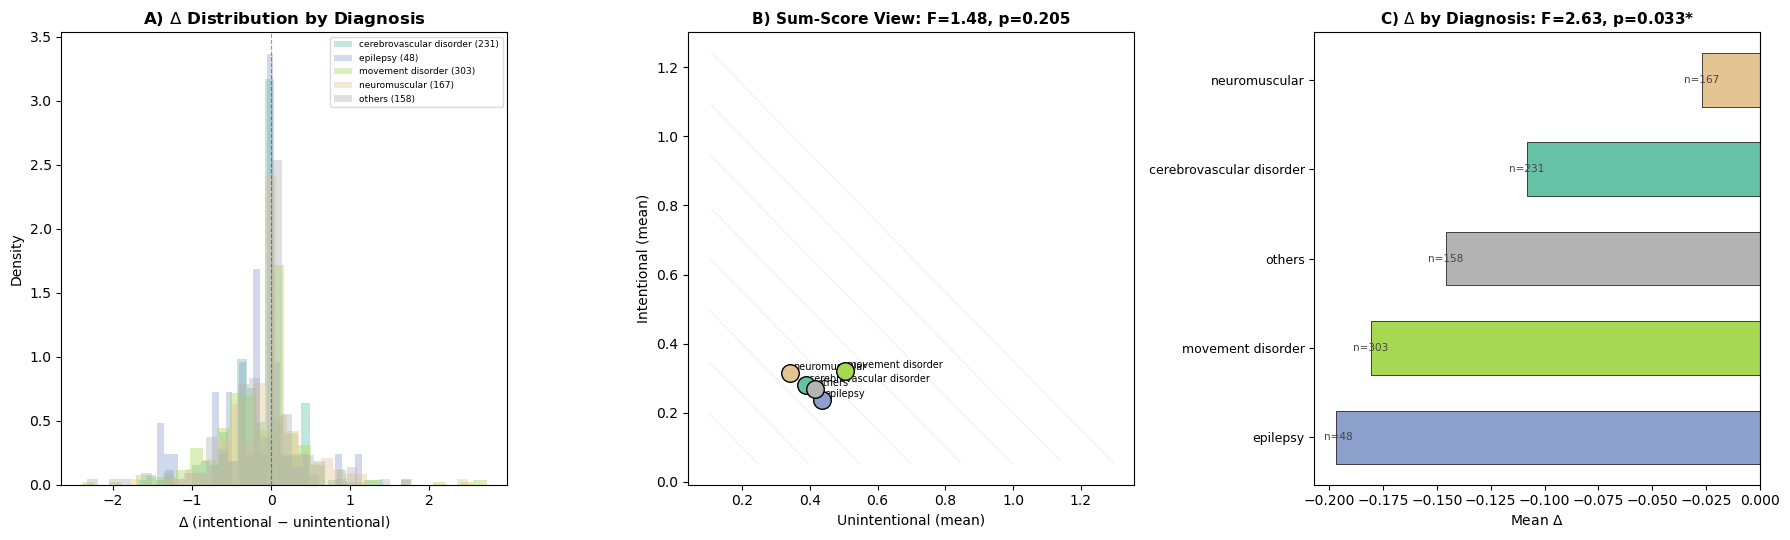

Saved: fig2_group_heterogeneity.png


In [36]:
groups_sorted = sorted(df['group'].unique())
gc = dict(zip(groups_sorted, plt.cm.Set2(np.linspace(0, 1, len(groups_sorted)))))
gm = df.groupby('group')[['unintentional','intentional','delta','mmas_proxy']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 5.5))

# --- A: delta distributions ---
ax = axes[0]
for g in groups_sorted:
    sub = df[df['group'] == g]
    ax.hist(sub['delta'], bins=30, alpha=0.4,
            label=f'{g} ({len(sub)})', color=gc[g], density=True)
ax.axvline(0, color='black', linestyle='--', alpha=0.4, lw=0.8)
ax.set_xlabel(r'$\Delta$ (intentional $-$ unintentional)', fontsize=10)
ax.set_ylabel('Density', fontsize=10)
ax.set_title(r'A) $\Delta$ Distribution by Diagnosis',
             fontsize=12, fontweight='bold')
ax.legend(fontsize=6.5, loc='upper right', framealpha=0.7)

# --- B: Group means — sum-score view ---
ax = axes[1]
for score in np.arange(0.3, 1.5, 0.15):
    xl = np.linspace(0, score, 100)
    yl = score - xl
    m = (xl >= 0.1) & (yl >= 0.05)
    if m.any():
        ax.plot(xl[m], yl[m], '-', color='#ccc', alpha=0.3, lw=0.7)
for g in groups_sorted:
    row = gm.loc[g]
    ax.scatter(row['unintentional'], row['intentional'],
               c=[gc[g]], s=160, zorder=5, edgecolors='black', linewidth=1)
    ax.annotate(g, (row['unintentional']+0.008, row['intentional']+0.008), fontsize=7)
ax.set_xlabel('Unintentional (mean)', fontsize=10)
ax.set_ylabel('Intentional (mean)', fontsize=10)
ax.set_title(f"B) Sum-Score View: F={sr['f_mmas']:.2f}, p={sr['p_mmas']:.3f}",
             fontsize=11, fontweight='bold')

# --- C: Group delta bar chart ---
ax = axes[2]
sorted_gm = gm.sort_values('delta')
for i, (g, row) in enumerate(sorted_gm.iterrows()):
    ax.barh(i, row['delta'], color=gc[g], edgecolor='black',
            linewidth=0.5, height=0.6)
    n_g = len(df[df['group'] == g])
    offset = 0.008 if row['delta'] < 0 else -0.008
    ha = 'right' if row['delta'] < 0 else 'left'
    ax.text(row['delta']+offset, i, f'n={n_g}',
            fontsize=7.5, va='center', ha=ha, color='#444')
ax.axvline(0, color='black', linestyle='-', alpha=0.4, lw=0.8)
ax.set_yticks(range(len(sorted_gm)))
ax.set_yticklabels(sorted_gm.index, fontsize=9)
ax.set_xlabel(r'Mean $\Delta$', fontsize=10)
ax.set_title(r'C) $\Delta$ by Diagnosis: F={:.2f}, p={:.3f}*'.format(
             sr['f_delta'], sr['p_delta']),
             fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('fig2_group_heterogeneity.png', dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()
print('Saved: fig2_group_heterogeneity.png')

## 6. Figure 3: Information Loss Quantification

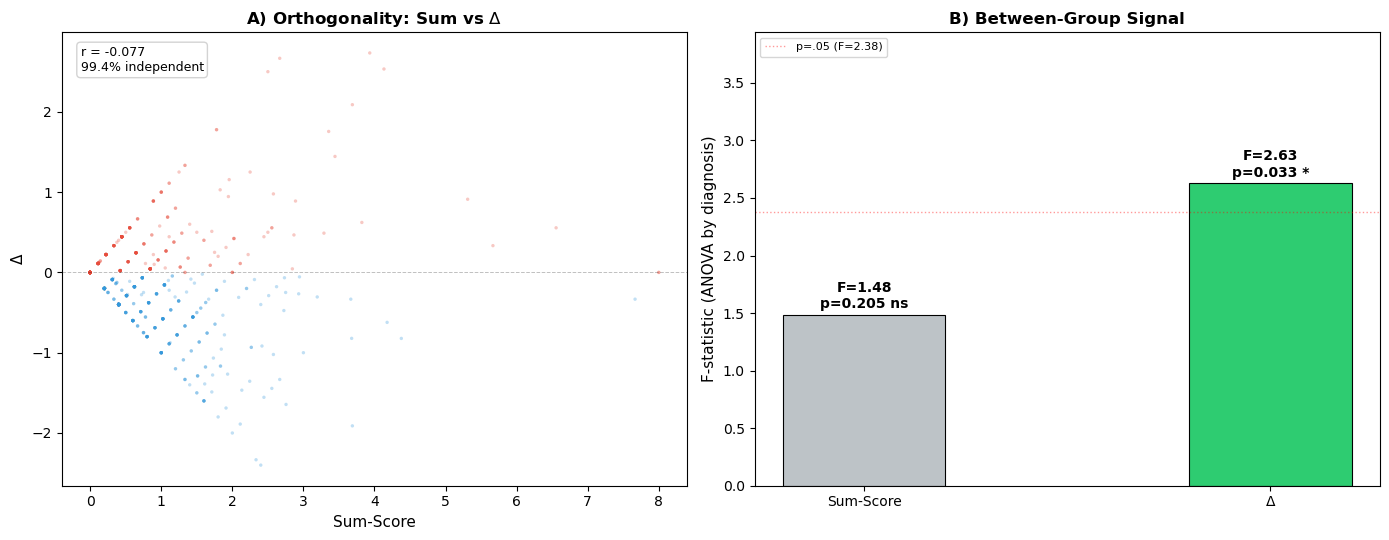

Saved: fig3_information_loss.png


In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5.5))

# --- A: Orthogonality scatter ---
ax = axes[0]
colors = np.where(df['delta'] >= 0, '#e74c3c', '#3498db')
ax.scatter(df['mmas_proxy'], df['delta'], c=colors, s=6, alpha=0.3,
           edgecolors='none')
ax.axhline(0, color='black', linestyle='--', alpha=0.25, lw=0.7)
ax.text(0.03, 0.97,
        f"r = {sr['r']:.3f}\n{(1-sr['r']**2)*100:.1f}% independent",
        transform=ax.transAxes, fontsize=9, va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                  edgecolor='#ccc', alpha=0.85))
ax.set_xlabel('Sum-Score', fontsize=11)
ax.set_ylabel(r'$\Delta$', fontsize=11)
ax.set_title(r'A) Orthogonality: Sum vs $\Delta$',
             fontsize=12, fontweight='bold')

# --- B: F-statistic comparison ---
ax = axes[1]
labels = ['Sum-Score', r'$\Delta$']
f_vals = [sr['f_mmas'], sr['f_delta']]
p_vals = [sr['p_mmas'], sr['p_delta']]
bar_colors = ['#bdc3c7', '#2ecc71']

bars = ax.bar(labels, f_vals, color=bar_colors, edgecolor='black',
              linewidth=0.8, width=0.4)
for bar, fv, pv in zip(bars, f_vals, p_vals):
    sl = '***' if pv<0.001 else '**' if pv<0.01 else '*' if pv<0.05 else 'ns'
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.06,
            f'F={fv:.2f}\np={pv:.3f} {sl}',
            ha='center', fontsize=10, fontweight='bold')

f_crit = stats.f.ppf(0.95, sr['k']-1, sr['n']-sr['k'])
ax.axhline(y=f_crit, color='red', linestyle=':', alpha=0.4, lw=1,
           label=f'p=.05 (F={f_crit:.2f})')
ax.set_ylabel('F-statistic (ANOVA by diagnosis)', fontsize=11)
ax.set_title('B) Between-Group Signal', fontsize=12, fontweight='bold')
ax.legend(fontsize=8, loc='upper left')
ax.set_ylim(0, max(f_vals)*1.5)

plt.tight_layout()
plt.savefig('fig3_information_loss.png', dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()
print('Saved: fig3_information_loss.png')

## 7. Export Results Summary

Write `results_summary.txt` for parity with the standalone script.

In [40]:
# Build results_summary.txt matching standalone script output
from scipy.stats import pearsonr, f_oneway, ttest_ind
from itertools import combinations

log = []
log.append('Differential Adherence Analysis -- NeuroGerAd Real Data')
log.append(f'Date: {pd.Timestamp.now().strftime("%Y-%m-%d %H:%M")}')
log.append('')
log.append(f'Data loaded: N={len(df)}, {df["group"].nunique()} diagnosis groups')
log.append('')
log.append('=' * 72)
log.append('DESCRIPTIVE STATISTICS')
log.append('=' * 72)
log.append(f'N = {len(df)}')
gc = df.groupby("group").size().to_dict()
log.append(f'Diagnosis groups: {gc}')
log.append('')
log.append('Sub-factor means (0-4 scale, higher = more nonadherent):')
for col, label, nitems in [('unintentional','Unintentional (forgetting, 5 items)',5),
                            ('intentional','Intentional (modification, 9 items)',9),
                            ('knowledge','Missing knowledge (4 items)',4)]:
    log.append(f'  {label}:  M = {df[col].mean():.3f}, SD = {df[col].std():.3f}')
log.append('')
log.append('Differential Adherence Index (delta = intentional - unintentional):')
log.append(f'  Mean = {df["delta"].mean():.3f}, SD = {df["delta"].std():.3f}')
log.append(f'  Range = [{df["delta"].min():.3f}, {df["delta"].max():.3f}]')
n_int = (df['delta'] >= 0).sum()
log.append(f'  Intentional-dominant (delta >= 0): {n_int} ({n_int/len(df)*100:.1f}%)')
log.append(f'  Unintentional-dominant (delta < 0): {len(df)-n_int} ({(len(df)-n_int)/len(df)*100:.1f}%)')
log.append('')
log.append('Sum-score proxy (MMAS-like = intentional + unintentional):')
log.append(f'  Mean = {df["mmas_proxy"].mean():.3f}, SD = {df["mmas_proxy"].std():.3f}')
log.append('')
log.append('-' * 72)
log.append('GROUP-LEVEL STATISTICS')
log.append('-' * 72)
log.append(f'{"Group":>35} {"N":>5} {"d Mean":>8} {"d SD":>7} {"%Int":>5} {"Sum Mean":>9} {"Sum SD":>7}')
log.append('-' * 72)
for name, g in sorted(df.groupby('group')):
    pct_int = (g['delta'] >= 0).mean() * 100
    log.append(f'{name:>35} {len(g):5d}   {g["delta"].mean():7.3f} {g["delta"].std():7.3f} {pct_int:5.1f}   {g["mmas_proxy"].mean():7.3f} {g["mmas_proxy"].std():7.3f}')
log.append('')
log.append('=' * 72)
log.append('STATISTICAL TESTS')
log.append('=' * 72)
r, p_r = pearsonr(df['mmas_proxy'], df['delta'])
log.append('Orthogonality (Pearson correlation, sum vs delta):')
log.append(f'  r = {r:.3f}, p = {p_r:.4f}')
log.append(f'  Shared variance: {r**2*100:.1f}%')
log.append(f'  Shared variance (r\u00b2): {r**2*100:.1f}%')
log.append(f'  -> Near-perfect orthogonality confirmed')
log.append('')
groups_list = sorted(df['group'].unique())
gd = [df[df['group']==g]['delta'].values for g in groups_list]
gs = [df[df['group']==g]['mmas_proxy'].values for g in groups_list]
F_d, p_d = f_oneway(*gd)
F_s, p_s = f_oneway(*gs)
k, n = len(gd), len(df)
eta2_d = (F_d*(k-1))/(F_d*(k-1)+(n-k))
eta2_s = (F_s*(k-1))/(F_s*(k-1)+(n-k))
log.append('One-way ANOVA by diagnosis group:')
sig_d = ' *' if p_d < 0.05 else ' ns'
sig_s = ' *' if p_s < 0.05 else ' ns'
log.append(f'  delta (differential):  F({k-1},{n-k}) = {F_d:.2f}, p = {p_d:.4f}{sig_d}, eta2 = {eta2_d:.4f}')
log.append(f'  Sum (MMAS-like):       F({k-1},{n-k}) = {F_s:.2f},  p = {p_s:.4f}{sig_s}, eta2 = {eta2_s:.4f}')
log.append('')
log.append('  * Groups differ significantly on delta but NOT on sum-score.')
log.append('    Sum-scoring destroys individual-level directionality (many-to-one projection).')
log.append('')
log.append('Pairwise comparisons on delta (independent samples t-test):')
log.append(f'  {"Comparison":<55} {"t":>7} {"p":>8} {"d":>7}  sig')
log.append('  ' + '-' * 76)
for g1, g2 in combinations(groups_list, 2):
    v1 = df[df['group']==g1]['delta']
    v2 = df[df['group']==g2]['delta']
    tv, pv = ttest_ind(v1, v2)
    dv = (v1.mean()-v2.mean()) / np.sqrt((v1.var()+v2.var())/2)
    s = '***' if pv<0.001 else '**' if pv<0.01 else ' *' if pv<0.05 else ' ns'
    log.append(f'  {g1+" vs "+g2:<55} {tv:7.2f} {pv:8.4f} {dv:7.2f}   {s}')

with open('results_summary.txt', 'w') as f:
    f.write('\n'.join(log))
print('Saved: results_summary.txt')


Saved: results_summary.txt


## 8. Session Info

In [43]:
import sys
print(f'Python: {sys.version}')
print(f'NumPy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
import matplotlib; print(f'Matplotlib: {matplotlib.__version__}')
import scipy; print(f'SciPy: {scipy.__version__}')
print(f'\nN = {len(df)}')
print(f'Groups: {list(df["group"].unique())}')

Python: 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:54:21) [Clang 16.0.6 ]
NumPy: 1.26.4
Pandas: 3.0.0
Matplotlib: 3.10.6
SciPy: 1.17.0

N = 907
Groups: ['movement disorder', 'cerebrovascular disorder', 'others', 'epilepsy', 'neuromuscular']
